# Introduction to Probability and Statistics
In this notebook, we will play around with some of the concepts we have previously discussed. Many concepts from probability and statistics are well-represented in major libraries for data processing in Python, such as `numpy` and `pandas`.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Random Variables and Distributions
Let's start with drawing a sample of 30 values from a uniform distribution from 0 to 9. We will also compute mean and variance.

In [2]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [8, 7, 4, 6, 5, 0, 2, 6, 3, 9, 4, 6, 9, 6, 1, 0, 10, 3, 3, 4, 8, 5, 4, 5, 7, 6, 0, 7, 2, 8]
Mean = 4.933333333333334
Variance = 7.52888888888889


To visually estimate how many different values are there in the sample, we can plot the **histogram**:

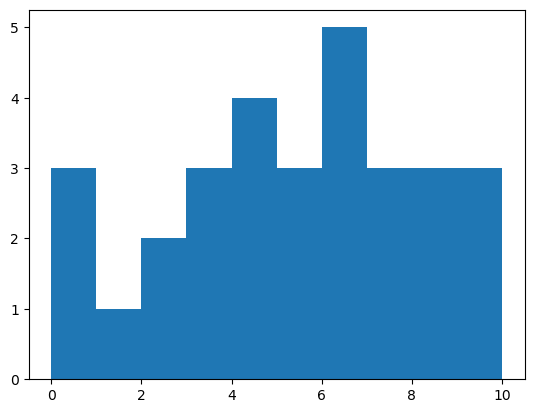

In [3]:
plt.hist(sample)
plt.show()

## Analyzing Real Data

Mean and variance are very important when analyzing real-world data. Let's load the data about baseball players from [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)

In [5]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Height','Weight','Age'])
df

,Name,Team,Role,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


> We are using a package called [**Pandas**](https://pandas.pydata.org/) here for data analysis. We will talk more about Pandas and working with data in Python later in this course.

Let's compute average values for age, height and weight:

In [6]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

Now let's focus on height, and compute standard deviation and variance: 

In [9]:
print(list(df['Height'])[:40])

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78, 79, 76, 74, 76, 72, 71, 75, 77, 74, 73, 74, 78, 73, 75, 73, 75, 75, 74, 69, 71]


In [10]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 73.6972920696325
Variance = 5.316798081118081
Standard Deviation = 2.305818310517566


In addition to mean, it makes sense to look at the median value and quartiles. They can be visualized using a **box plot**:

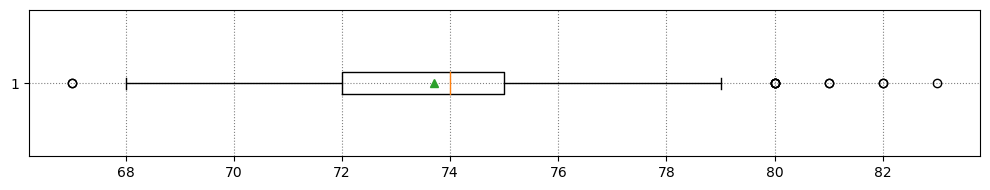

In [11]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

We can also make box plots of subsets of our dataset, for example, grouped by player role.

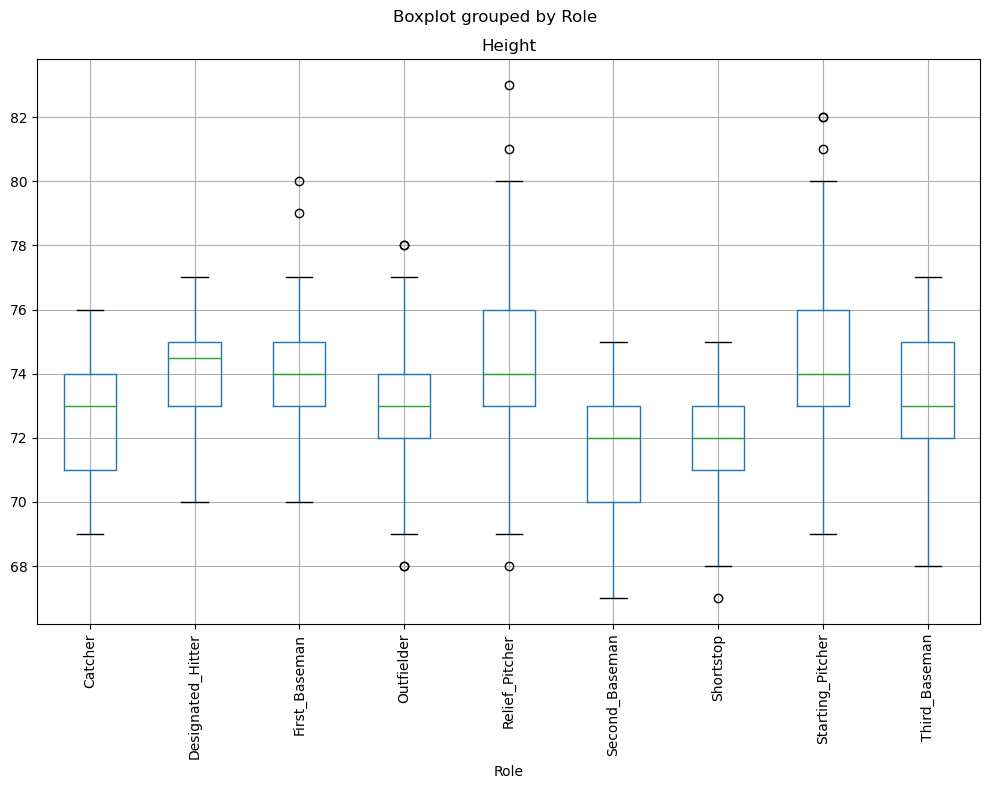

In [36]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Note**: This diagram suggests, that on average, the heights of first basemen are higher than heights of second basemen. Later we will learn how we can test this hypothesis more formally, and how to demonstrate that our data is statistically significant to show that.  

Age, height and weight are all continuous random variables. What do you think their distribution is? A good way to find out is to plot the histogram of values: 

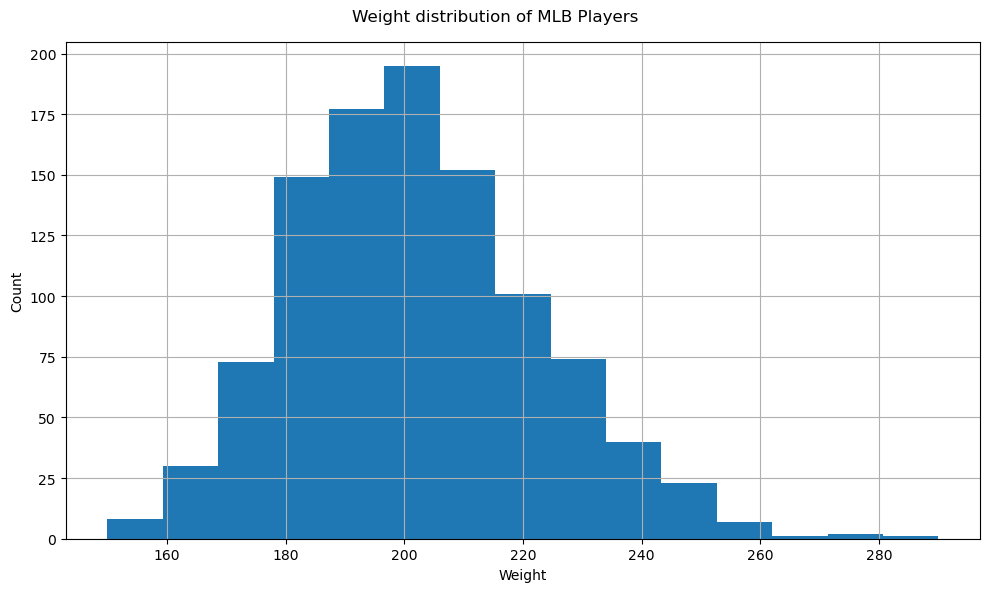

In [13]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normal Distribution

Let's create an artificial sample of weights that follows a normal distribution with the same mean and variance as our real data:

In [15]:
generated = np.random.normal(mean, std, 1000)
generated[:40]

array([72.06039054, 71.88892728, 71.54340028, 76.30025042, 75.14421318,
       72.21710274, 70.32013519, 73.37702099, 74.75721607, 74.31894563,
       73.73013216, 74.63310479, 73.19444865, 71.42804898, 71.36155127,
       75.03941559, 74.99444212, 73.80726426, 74.56678393, 76.61367872,
       73.45838104, 73.59296431, 74.62260965, 69.83620423, 73.90963303,
       76.32597577, 71.18053577, 75.45516071, 72.42034877, 76.97542682,
       75.1880133 , 76.87622422, 76.25300607, 74.54444022, 73.61119686,
       71.99384931, 74.86920613, 76.45546752, 71.32079439, 80.13021947])

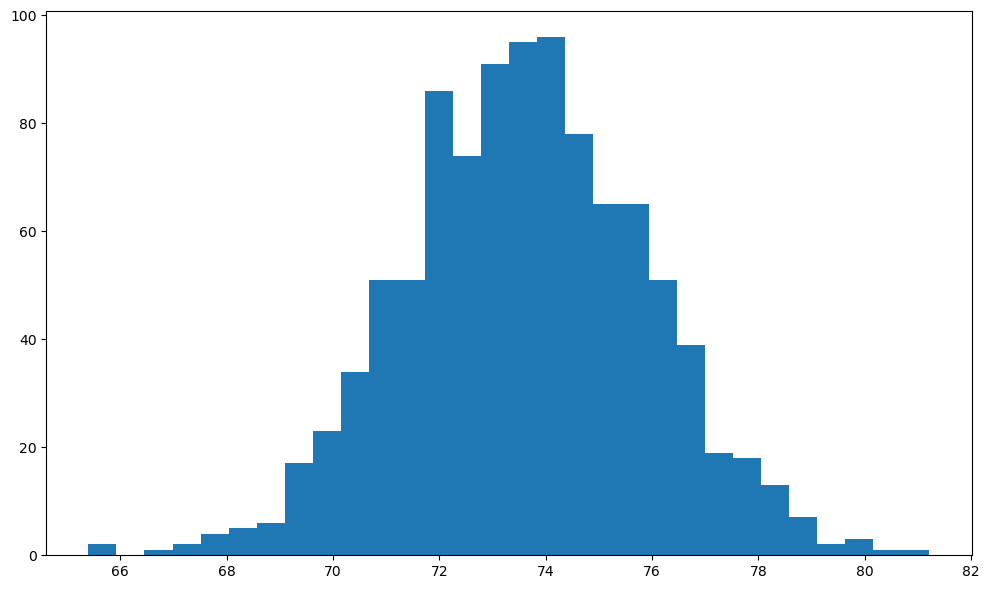

In [19]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=30)
plt.tight_layout()
plt.show()

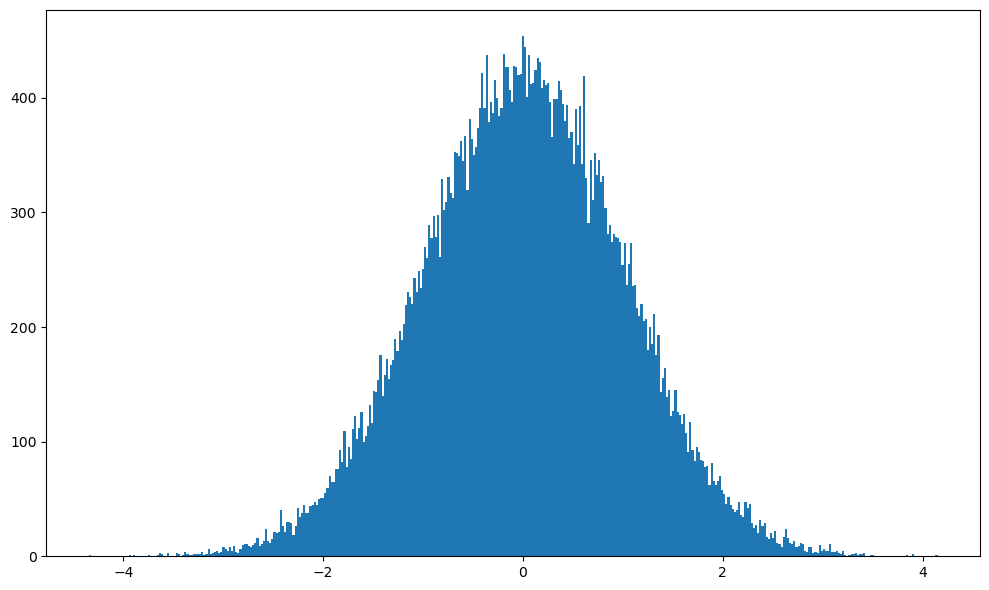

In [20]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=400)
plt.tight_layout()
plt.show()

Since most values in real life are normally distributed, we should not use a uniform random number generator to generate sample data. Here is what happens if we try to generate weights with a uniform distribution (generated by `np.random.rand`):

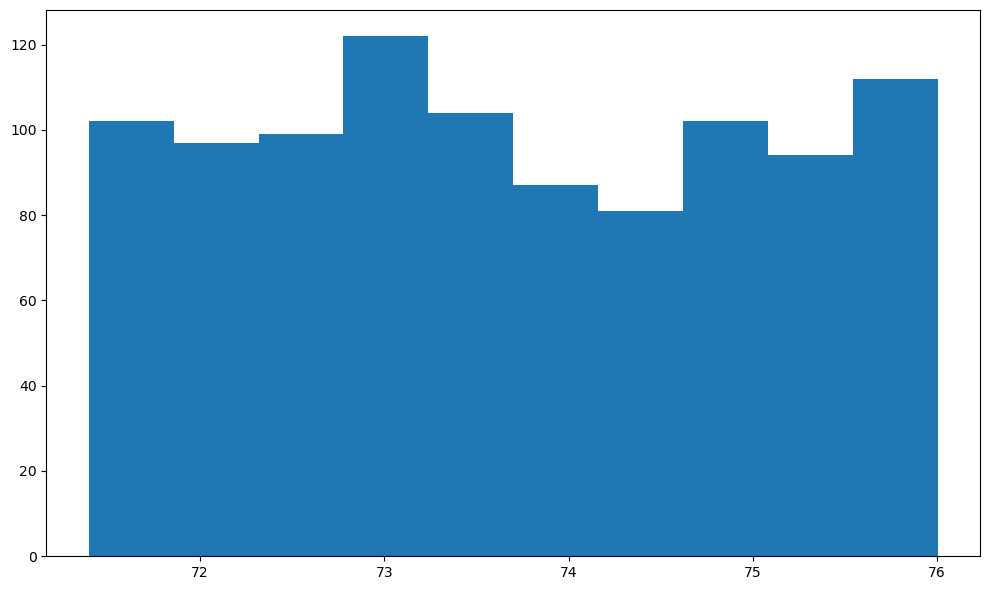

In [24]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Confidence Intervals

Let's now calculate confidence intervals for the weights and heights of baseball players. We will use the code [from this stackoverflow discussion](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):

In [25]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 201.73 ± 0.94
p=0.90, mean = 201.73 ± 1.08
p=0.95, mean = 201.73 ± 1.28


## Hypothesis Testing

Let's explore different roles in our baseball players dataset:

In [26]:
df.groupby('Role').agg({ 'Height' : 'mean', 'Weight' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Height,Weight,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


### First Basemen are taller than Second Basemen
Let's test the hypothesis that First Basemen are taller than Second Basemen. The simplest way to do this is to test the confidence intervals:

In [27]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81


We can see that the intervals do not overlap, which helps prove our hypothesis.

A statistically more correct way to prove the hypothesis is to use a **Student t-test**:

In [112]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738926e-12


The two values returned by the `ttest_ind` function are:
* p-value can be considered as the probability of two distributions having the same mean. In our case, it is very low, meaning that there is strong evidence supporting that first basemen are taller.
* t-value is the intermediate value of normalized mean difference that is used in the t-test, and it is compared against a threshold value for a given confidence value.
    - more about the t-value, according to ![statisticshowto](https://www.statisticshowto.com/probability-and-statistics/t-test/), in simpler terms it is the "difference between two groups and the difference within two groups". So larger means more difference between two groups and smaller means smaller. "bigger t-values equal a greater probability that the results are repeatable".

### First Basemen are older than Second Basemen
Using more student t-tests I will test the hypothesis that First Basemen are older than Second Basemen

In [37]:
from scipy.stats import ttest_ind

age12_t, age12_p = ttest_ind(df.loc[df['Role']=='First_Baseman', ['Age']], df.loc[df['Role']=='Second_Baseman',['Age']],equal_var=False)
print(f"T-value = {age12_t[0]:.2f}\nP-value: {age12_p[0]}")

T-value = 0.53
P-value: 0.6005513264471434


From this, the p-value is even lower meaning there is strong evidence supporting the hypothesis but the t-value is also really low meaning there is not much difference between the two data sets. I will also perform a confidence interval test to see what happens there.

In [39]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Age']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Age']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 28.56..30.39, 2nd basemen height: 28.18..29.87
Conf=0.90, 1st basemen height: 28.42..30.53, 2nd basemen height: 28.06..29.99
Conf=0.95, 1st basemen height: 28.22..30.73, 2nd basemen height: 27.87..30.18


We can see the intervals for every confidence level overlap which does not help prove the hypothesis. <br>

Now I will try to compare the histograms of First Baseman Ages and Second Baseman Ages to see if that kind of makes sense with the data and my conclusion that the statemen *First Basemen are older than Second Basemen* is **true** but there is a lot of overlap. 

29.474727272727268


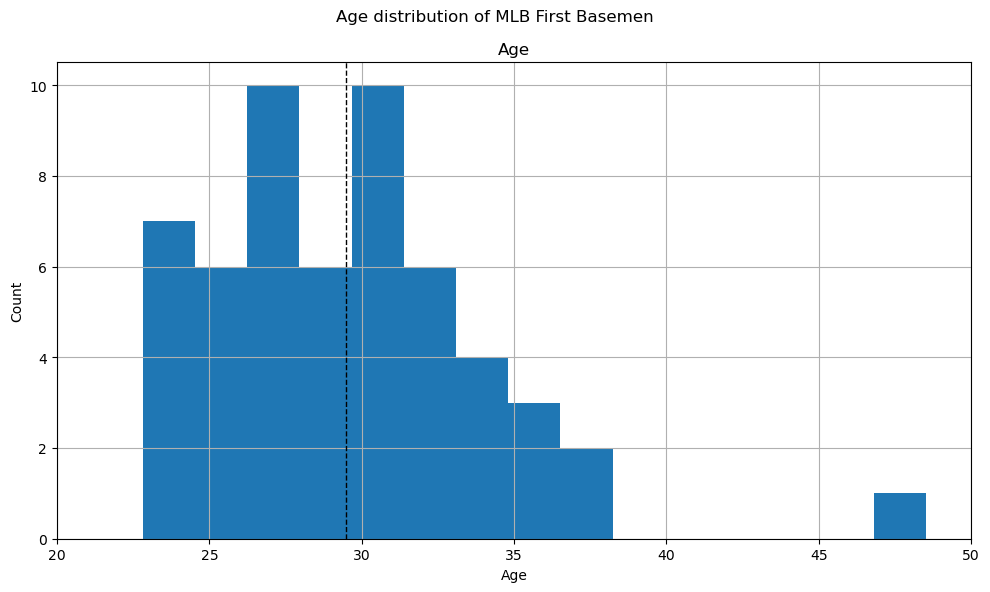

In [92]:
df.loc[df['Role']=='First_Baseman', ['Age']].hist(bins=15, figsize=(10,6))
plt.suptitle('Age distribution of MLB First Basemen')
plt.xlabel('Age')
plt.xlim(20,50) # set limits of the x-axis so it's easier to compare
plt.ylabel('Count')
plt.tight_layout()

# plot line for mean, from here: https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
fb_ages = df.loc[df['Role']=='First_Baseman', ['Age']]#; print(fb_ages)
mean = fb_ages.mean().item() # item probABLy turns it into an item, not entirely sure
print(mean)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

plt.show()

29.026896551724143


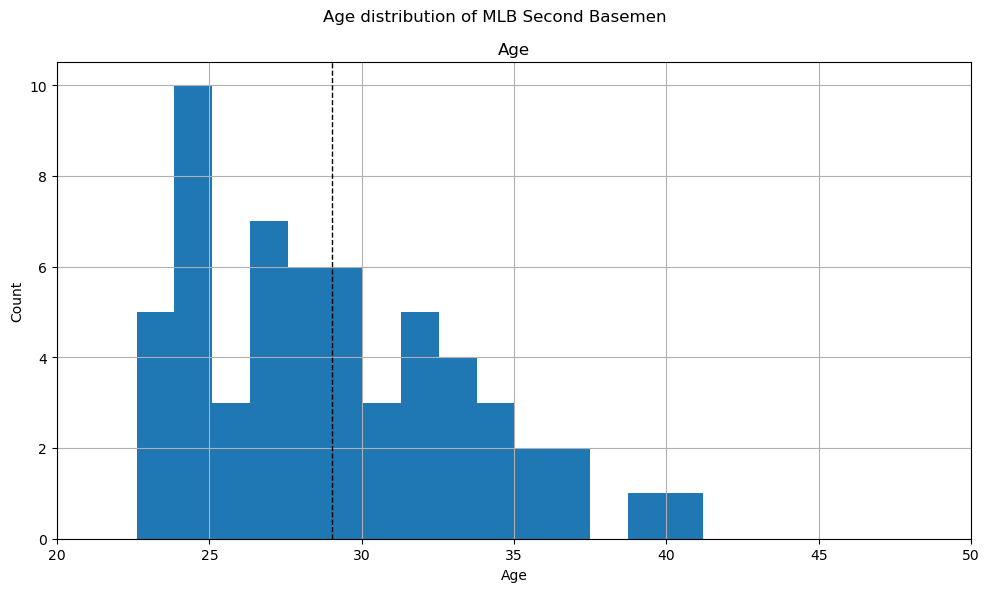

In [93]:
df.loc[df['Role']=='Second_Baseman', ['Age']].hist(bins=15, figsize=(10,6))
plt.suptitle('Age distribution of MLB Second Basemen')
plt.xlabel('Age')
plt.xlim(20,50) # set limits of the x-axis so it's easier to compare
plt.ylabel('Count')

# plot line for mean
fb_ages = df.loc[df['Role']=='Second_Baseman', ['Age']]#; print(fb_ages)
mean = fb_ages.mean().item() # item probABLy turns it into an item, not entirely sure
print(mean) # again, not sure if mean is accurate
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

plt.tight_layout()
plt.show()

### First Basemen are taller than Third Baseman
I will again test using both types (intervals + t-test)

In [80]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Third_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 3rd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 3rd basemen height: 72.58..73.51
Conf=0.90, 1st basemen height: 73.56..74.44, 3rd basemen height: 72.51..73.58
Conf=0.95, 1st basemen height: 73.47..74.53, 3rd basemen height: 72.40..73.68


Intervals overlap for confidence intervals 0.90 and 0.95 , but not as much as before. 

Now using t-test...

In [74]:
from scipy.stats import ttest_ind

height13_t, height13_p = ttest_ind(df.loc[df['Role']=='First_Baseman', ['Height']], df.loc[df['Role']=='Third_Baseman',['Height']],equal_var=False)
print(f"T-value = {height13_t[0]:.2f}\nP-value: {height13_p[0]}")

T-value = 2.32
P-value: 0.022856341575105264


That looks pretty good! I decide this hypothesis is __true__. Now for more practice with histograms

74.0


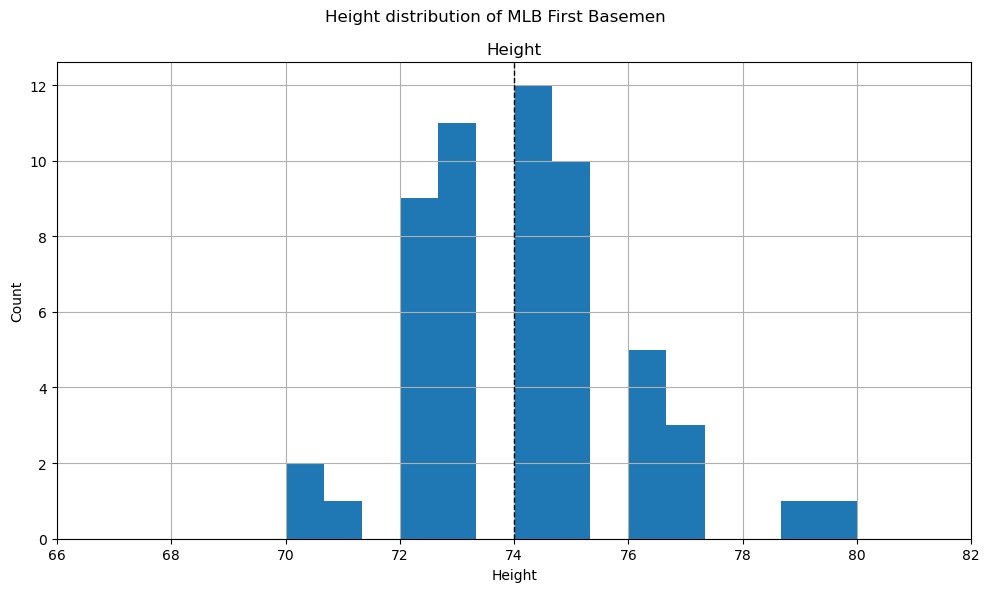

In [78]:
df.loc[df['Role']=='First_Baseman', ['Height']].hist(bins=15, figsize=(10,6))
plt.suptitle('Height distribution of MLB First Basemen')
plt.xlabel('Height')
plt.xlim(66, 82) # set limits of the x-axis so it's easier to compare
plt.ylabel('Count')
plt.tight_layout()

# plot line for mean
fb_ages = df.loc[df['Role']=='First_Baseman', ['Height']]#; print(fb_ages)
mean = fb_ages.mean().item() # item probABLy turns it into an item, not entirely sure
print(mean)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

plt.show()

73.04444444444445


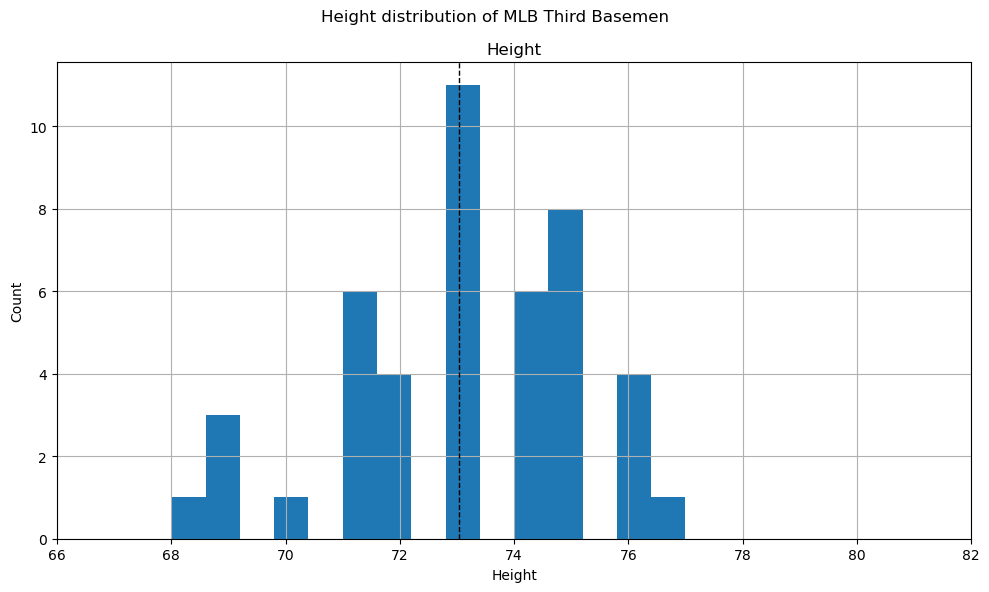

In [79]:
df.loc[df['Role']=='Third_Baseman', ['Height']].hist(bins=15, figsize=(10,6))
plt.suptitle('Height distribution of MLB Third Basemen')
plt.xlabel('Height')
plt.xlim(66, 82) # set limits of the x-axis so it's easier to compare
plt.ylabel('Count')
plt.tight_layout()

# plot line for mean
fb_ages = df.loc[df['Role']=='Third_Baseman', ['Height']]#; print(fb_ages)
mean = fb_ages.mean().item() # item probABLy turns it into an item, not entirely sure
print(mean)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

plt.show()

### Shortstops are taller than Second Baseman
let's do this one more time

First, with confidence intervals:

In [83]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='Shortstop',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, shortstop height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, shortstop height: 71.54..72.27, 2nd basemen height: 71.04..71.69
Conf=0.90, shortstop height: 71.49..72.32, 2nd basemen height: 70.99..71.73
Conf=0.95, shortstop height: 71.40..72.40, 2nd basemen height: 70.92..71.81


Like the previous scenario, they overlap a little, but for all. A bit more than the previous scenario in general though.

In [84]:
from scipy.stats import ttest_ind

height13_t, height13_p = ttest_ind(df.loc[df['Role']=='Shortstop', ['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {height13_t[0]:.2f}\nP-value: {height13_p[0]}")

T-value = 1.62
P-value: 0.10763413630751072


So, again, with what I have learned here the hypothesis is proven __true__ but there is some overlap. So kind of true? Honestly I'm just kind of confused. Will continue with the histogram practice:

71.90384615384616


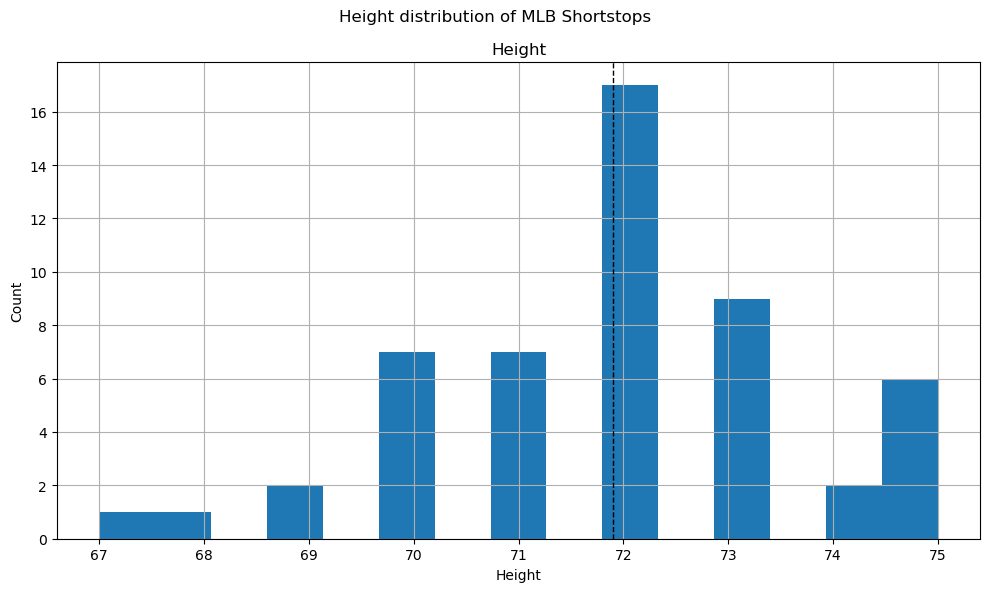

In [86]:
df.loc[df['Role']=='Shortstop', ['Height']].hist(bins=15, figsize=(10,6))
plt.suptitle('Height distribution of MLB Shortstops')
plt.xlabel('Height')
#plt.xlim(66, 82) # set limits of the x-axis so it's easier to compare
plt.ylabel('Count')
plt.tight_layout()

# plot line for mean
fb_ages = df.loc[df['Role']=='Shortstop', ['Height']]#; print(fb_ages)
mean = fb_ages.mean().item() # item probABLy turns it into an item, not entirely sure
print(mean)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

plt.show()

71.36206896551724


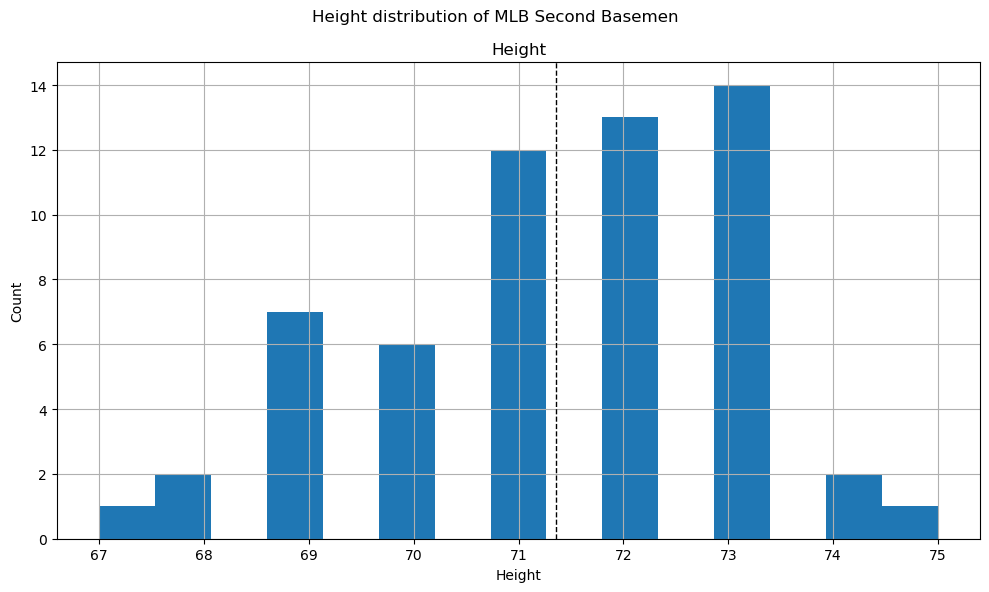

In [88]:
df.loc[df['Role']=='Second_Baseman', ['Height']].hist(bins=15, figsize=(10,6))
plt.suptitle('Height distribution of MLB Second Basemen')
plt.xlabel('Height')
#plt.xlim(66, 82) # set limits of the x-axis so it's easier to compare
plt.ylabel('Count')
plt.tight_layout()

# plot line for mean
fb_ages = df.loc[df['Role']=='Second_Baseman', ['Height']]#; print(fb_ages)
mean = fb_ages.mean().item() # item probABLy turns it into an item, not entirely sure
print(mean)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

plt.show()

## Simulating a Normal Distribution with the Central Limit Theorem

The pseudo-random generator in Python is designed to give us a uniform distribution. If we want to create a generator for normal distribution, we can use the central limit theorem. To get a normally distributed value we will just compute a mean of a uniform-generated sample.

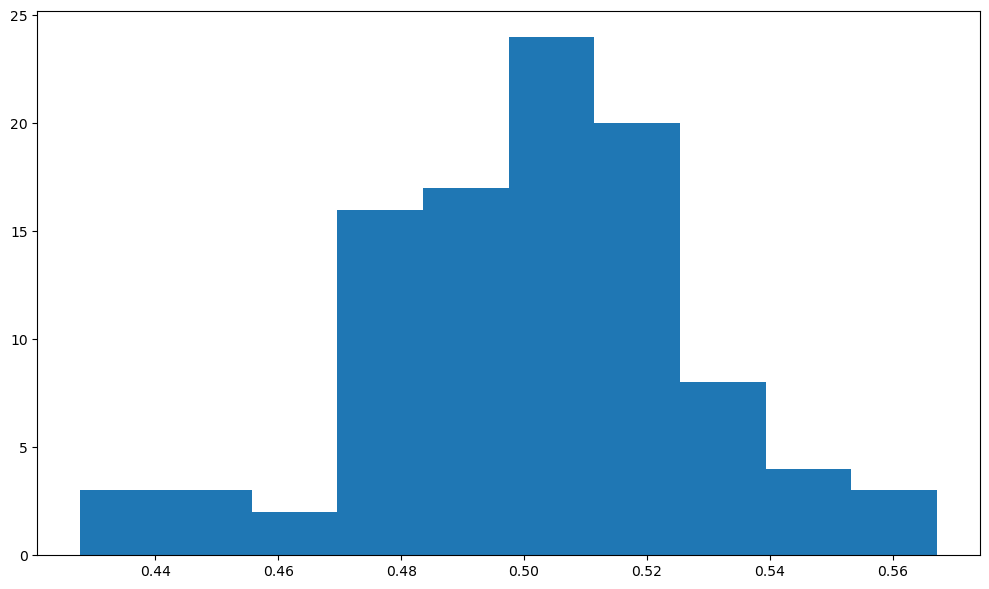

In [91]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Correlation and Evil Baseball Corp

Correlation allows us to find relations between data sequences. In our toy example, let's pretend there is an evil baseball corporation that pays its players according to their height - the taller the player is, the more money they get. Suppose there is a base salary of $1000, and an additional bonus from 0 dollars to 100 dollars, depending on height. We will take the real players from MLB, and compute their imaginary salaries:

In [94]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(74, 1075.2469071629068), (74, 1075.2469071629068), (72, 1053.7477908306478), (72, 1053.7477908306478), (73, 1064.4973489967772), (69, 1021.4991163322591), (69, 1021.4991163322591), (71, 1042.9982326645181), (76, 1096.746023495166), (71, 1042.9982326645181)]


Let's now compute covariance and correlation of those sequences. `np.cov` will give us a so-called **covariance matrix**, which is an extension of covariance to multiple variables. The element $M_{ij}$ of the covariance matrix $M$ is a correlation between input variables $X_i$ and $X_j$, and diagonal values $M_{ii}$ is the variance of $X_{i}$. Similarly, `np.corrcoef` will give us the **correlation matrix**.

In [95]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[  5.31679808  57.15323023]
 [ 57.15323023 614.37197275]]
Covariance = 57.153230230544644
Correlation = 1.0


A correlation equal to 1 means that there is a strong **linear relation** between two variables. We can visually see the linear relation by plotting one value against the other:

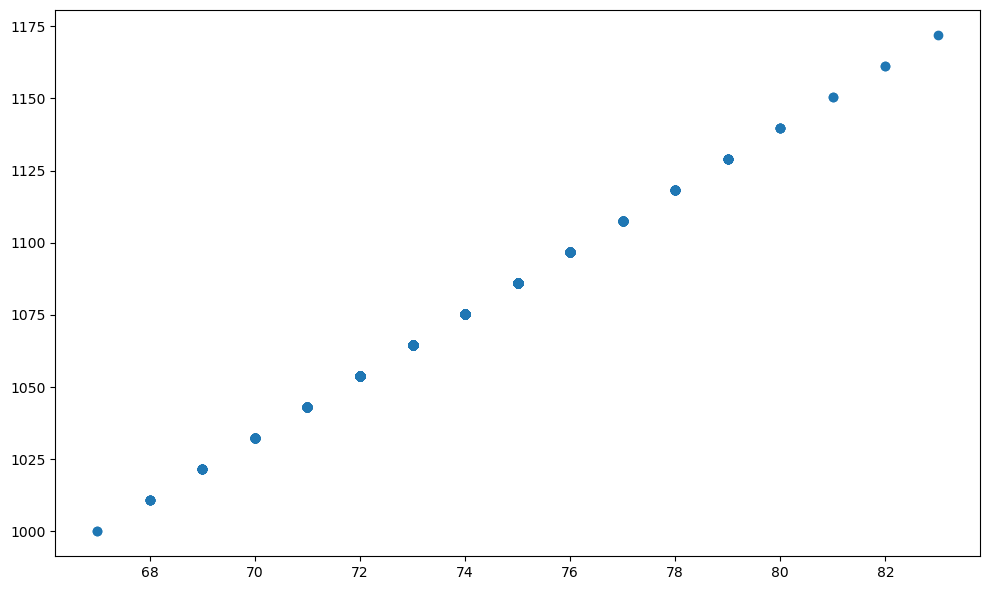

In [96]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Let's see what happens if the relation is not linear. Suppose that our corporation decided to hide the obvious linear dependency between heights and salaries, and introduced some non-linearity into the formula, such as `sin`:

In [97]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9835304456670814


In this case, the correlation is slightly smaller, but it is still quite high. Now, to make the relation even less obvious, we might want to add some extra randomness by adding some random variable to the salary. Let's see what happens:

In [98]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9345276162428585


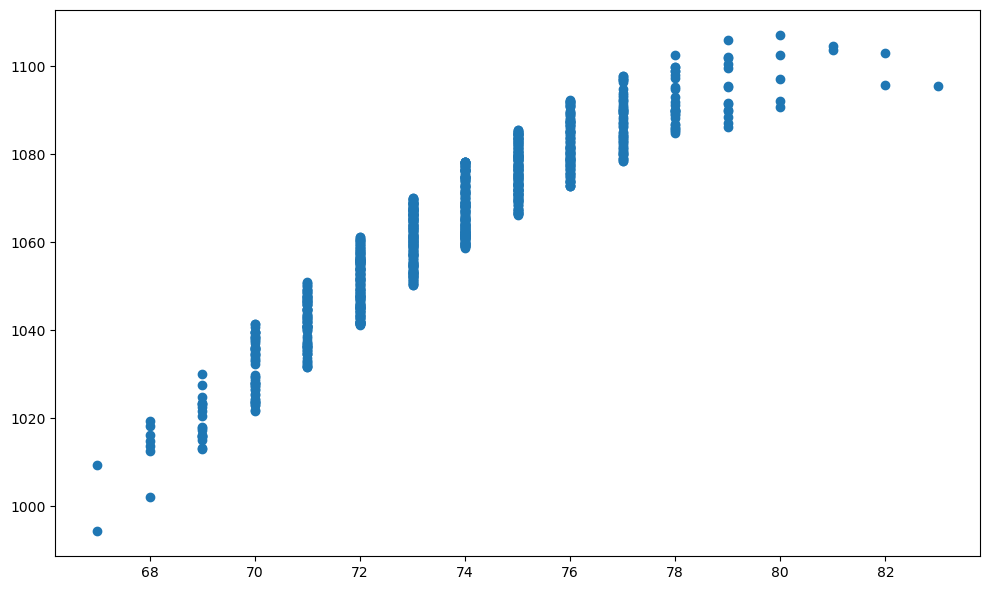

In [99]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Can you guess why the dots line up into vertical lines like this?
>   - Maybe because sin is a periodic function so it will repeat certain values which is why they line up?

We have observed the correlation between an artificially engineered concept like salary and the observed variable *height*. Let's also see if the two observed variables, such as height and weight, correlate too:

In [100]:
np.corrcoef(df['Height'],df['Weight'])

array([[ 1., nan],
       [nan, nan]])

Unfortunately, we did not get any results - only some strange `nan` values. This is due to the fact that some of the values in our series are undefined, represented as `nan`, which causes the result of the operation to be undefined as well. By looking at the matrix we can see that `Weight` is the problematic column, because self-correlation between `Height` values has been computed.

> This example shows the importance of **data preparation** and **cleaning**. Without proper data we cannot compute anything.

Let's use `fillna` method to fill the missing values, and compute the correlation: 

In [110]:
print(np.corrcoef(df['Height'],df['Weight'].fillna(method='pad')))
print(f"Covariance = {np.cov(df['Height'],df['Weight'].fillna(method='pad'))[0,1]}")
print(f"Correlation = {np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))[0,1]}")

[[1.         0.52959196]
 [0.52959196 1.        ]]
Covariance = 25.662472077159727
Correlation = 0.529591960290391


There is indeed a correlation, but not such a strong one as in our artificial example. Indeed, if we look at the scatter plot of one value against the other, the relation would be much less obvious:

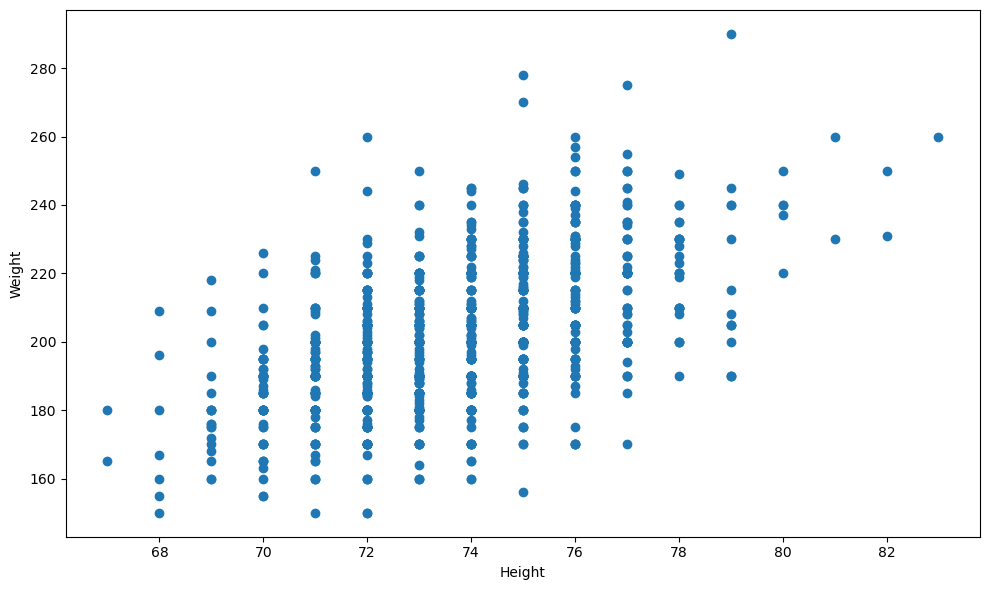

In [111]:
plt.figure(figsize=(10,6))
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()

## Conclusion

In this notebook we have learnt how to perform basic operations on data to compute statistical functions. We now know how to use a sound apparatus of math and statistics in order to prove some hypotheses, and how to compute confidence intervals for arbitrary variables given a data sample. 